In [9]:
%reset -f

In [10]:
import pandas as pd
import numpy as np
arms_data = pd.read_csv('Arms.csv')
heads_data = pd.read_csv('Heads.csv')
torsos_data = pd.read_csv('Torsos.csv')
legs_data = pd.read_csv('Legs.csv')

In [11]:
def get_playstyle_list(dataframe):
        return dataframe["Playstyle"].drop_duplicates().to_list()

def progressively_order(dataframe):
        # Assign a check number based on the progressive order of each item
        playstyle_list = get_playstyle_list(dataframe)
        if not 'Check Number' in dataframe:
                dataframe.insert(1, 'Check Number', '')
        dataframe = dataframe.sort_values(by=['Playstyle', 'Level'])
        for playstyle in playstyle_list:
                i = 1
                for index, row in dataframe[dataframe['Playstyle'] == playstyle].iterrows():
                        dataframe.at[index, 'Check Number'] = i
                        i += 1
        return dataframe

arms_data = progressively_order(arms_data)
heads_data = progressively_order(heads_data)
torsos_data = progressively_order(torsos_data)
legs_data = progressively_order(legs_data)

In [12]:
# Clean up singlequotes

# def replace_quotes(dataframe: pd.DataFrame):
#         # dataframe.replace("\u2019", "'")
#         dataframe.replace("Any", "All-Purpose")

# arms_data = replace_quotes(arms_data)
# heads_data = replace_quotes(heads_data)
# torsos_data = replace_quotes(torsos_data)
# legs_data = replace_quotes(legs_data)

In [13]:
# Removes items that are obtained in a certain way.
def pop_if_obtained_via(dataframe: pd.DataFrame, methods: list):
        # Create a deep copy so the original dataframe is not mutable
        dataframe = dataframe.copy()

        # Safety check for a list (python moment)
        if isinstance(methods, str):
                methods = [methods]

        for method in methods:
                # Remove anything in Also
                for index, row in dataframe[dataframe['Also Obtained Via'] == method].iterrows():
                        dataframe.at[index, 'Also Obtained Via'] = np.nan

                # If the first method isn't valid, copy over the second one to it
                for index, row in dataframe[dataframe['Obtained Via'] == method].iterrows():
                        dataframe.at[index, 'Obtained Via'] = dataframe.at[index, 'Also Obtained Via']
                        # If it ends up null, then just remove it entirely
                        if pd.isnull(dataframe.at[index, 'Obtained Via']):
                                dataframe = dataframe.drop(index)

        dataframe = dataframe.reset_index(drop=True)
        dataframe = progressively_order(dataframe)
        return dataframe

# pop_if_obtained_via(df, ('Shop'))

In [14]:
import itertools

# Get all combinations of obtained methods
OBTAINED_METHODS = ['Trade', 'Shop', 'Chest', 'Quest']
obtained_combinations = [[]]
obtained_combinations.append(OBTAINED_METHODS)
for n in range(2, 5):
        obtained_combinations.append((list(itertools.combinations(OBTAINED_METHODS, n))))

print(obtained_combinations)

[[], ['Trade', 'Shop', 'Chest', 'Quest'], [('Trade', 'Shop'), ('Trade', 'Chest'), ('Trade', 'Quest'), ('Shop', 'Chest'), ('Shop', 'Quest'), ('Chest', 'Quest')], [('Trade', 'Shop', 'Chest'), ('Trade', 'Shop', 'Quest'), ('Trade', 'Chest', 'Quest'), ('Shop', 'Chest', 'Quest')], [('Trade', 'Shop', 'Chest', 'Quest')]]


In [15]:
#####
#
# Code taken from https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-96.php
#
#####

# Import the 'sub' function from the 're' module for regular expression substitution
from re import sub

# Define a function to convert a string to camel case
def camel_case(s):
    # Use regular expression substitution to replace underscores and hyphens with spaces,
    # then title case the string (capitalize the first letter of each word), and remove spaces
    s = sub(r"(_|-)+", " ", s).title().replace(" ", "")

    # Join the string, ensuring the first letter is lowercase
    return ''.join([s[0].lower(), s[1:]])


['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose', 'Defensive', 'Ranged', 'Special']
['Defensive', 'Melee', 'Ranged', 'Special']
['All-Purpose']
['All-Purpose', 'Defensive', 'Melee', 'Ranged', 'Special']
[]


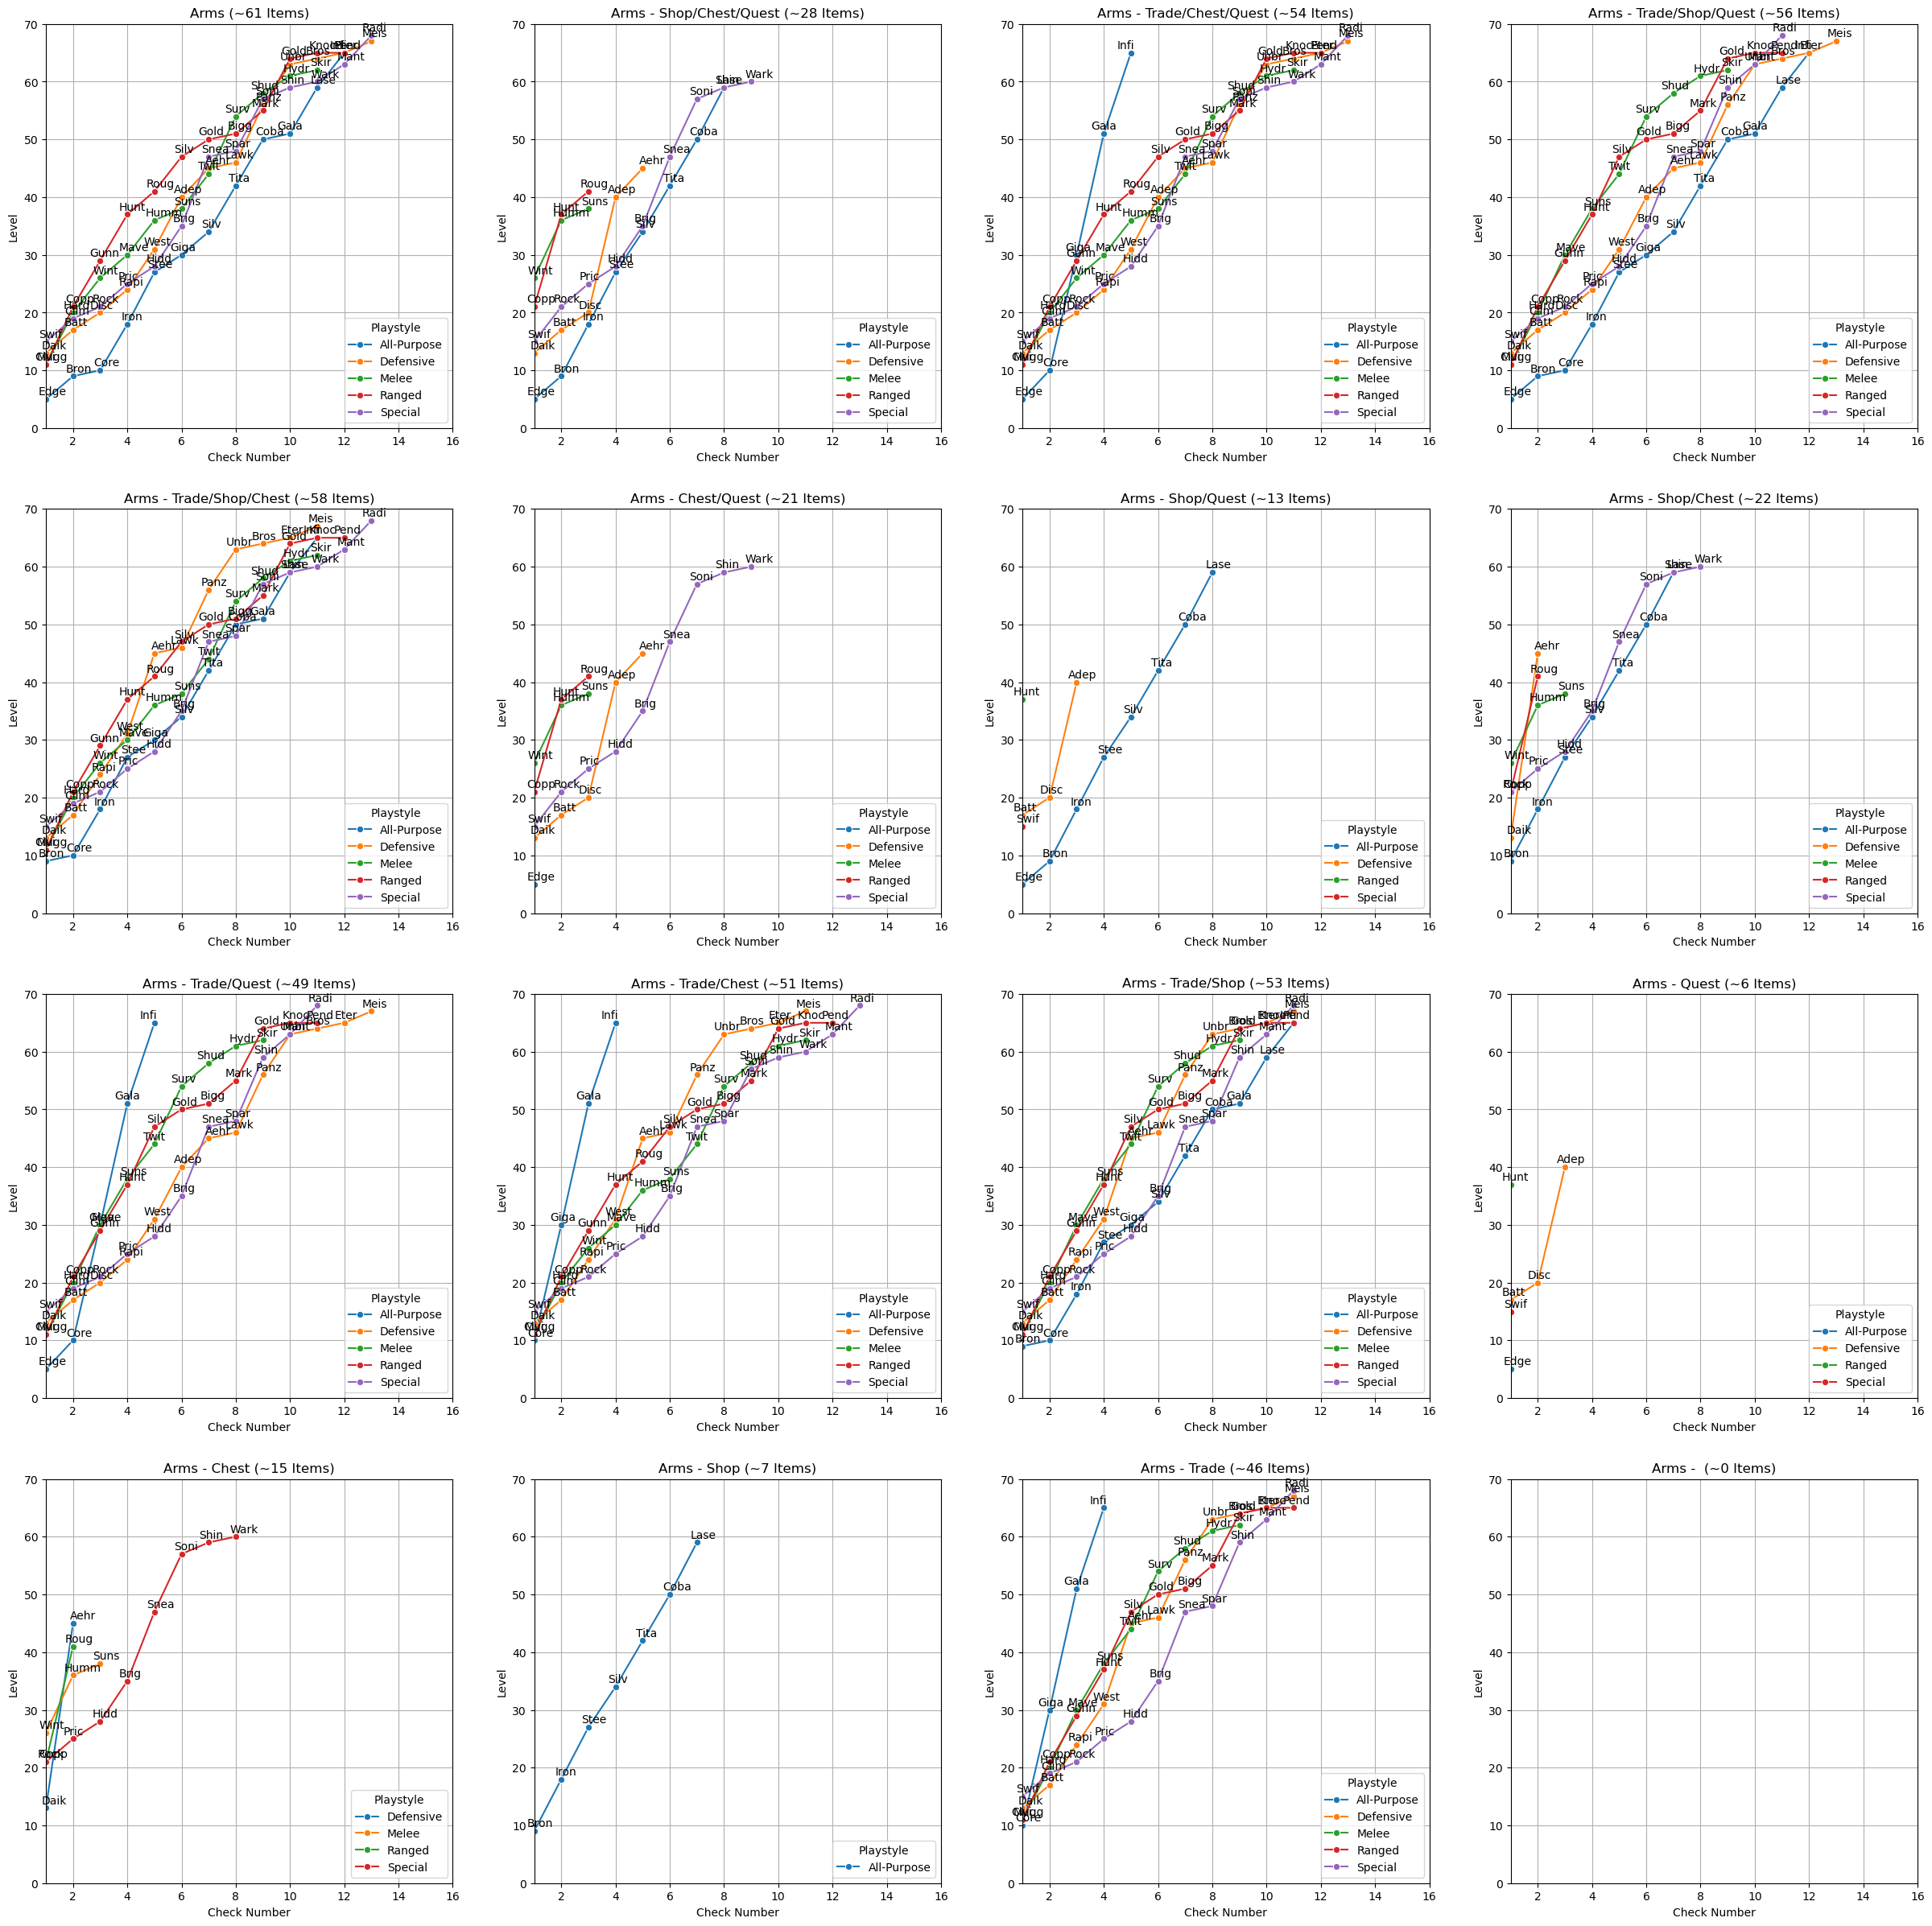

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import json

series_colors = {
        'Any': '#888888',
        'Offensive': '#D62728',
        'Melee': '#D62728',
        'Defensive': '#1F77B4',
        'Ranged': '#FF6C08',
        'Special': '#9467BD',
        'Botany': '#2CA02C',
}

# Adds text labels to each marker.
def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
                # Do some math to center each label approximately
                ax.text(
                        point['x'] - .025 * len(str(point['val'])),
                        point['y'] + 0.75,
                        str(point['val'][:4])
                )
                # Initials:
                # ax.text(point['x']-.025*len(str(point['val'])), point['y']+0.75, ''.join(x[0].upper() + x[1] for x in str(point['val']).split()))

def plot_graphs_and_write_json(df: pd.DataFrame, title: str, max_lim: int):
        plt.rcParams['axes.grid'] = True
        plt.rcParams['legend.loc'] = 'lower right'

        fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(30,30))
        plt.setp(ax, xlim=(1, max_lim), ylim=(0, 70))
        for a in ax.flatten():
                loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
                a.xaxis.set_major_locator(loc)

        # Botany/Drill Recategorize
        # df = progressively_order(df.replace('Botany', 'Any'))
        # df = progressively_order(df[~df['Name'].str.contains('Drill')])


        # Subplot [0][0]: No rando enabled
        sns.lineplot(x='Check Number', y='Level', marker='o', hue='Playstyle', ax=ax[0][0], data=df).title.set_text('{0} (~{1} Items)'.format(title, str(len(df.index))))
        label_point(df['Check Number'], df['Level'], df['Name'], ax[0][0])

        # Reset JSON data
        json_filename = f'./Progressive{title}.json'
        json_data = {}
        open(json_filename, 'w').close()

        # Disable every combination of rando toggles and graph it
        v = 0
        w = 1
        for sub_combinations in obtained_combinations:
                for combo in sub_combinations:
                        # If the combo is a single string, make this an array with one string
                        if isinstance(combo, str): combo = [combo]
                        combo_inverted = list(filter(lambda x: x not in combo, OBTAINED_METHODS))
                        graph_data = pop_if_obtained_via(df, combo)


                        ### TODO: MODIFY GRAPH DATA HERE


                        sns.lineplot(
                                x='Check Number', y='Level', marker='o', hue='Playstyle',
                                ax=ax[v][w],
                                # data=graph_data).title.set_text('{0} - No {1} (~{2})'.format(title, '/'.join(combo), str(len(graph_data.index)) + ' Items'))
                                data=graph_data).title.set_text('{0} - {1} (~{2})'.format(title, '/'.join(combo_inverted), str(len(graph_data.index)) + ' Items'))
                        label_point(graph_data['Check Number'], graph_data['Level'], graph_data['Name'], ax[v][w])

                        # Prepare JSON output
                        playstyle_list = get_playstyle_list(graph_data)
                        print(playstyle_list)
                        for playstyle in playstyle_list:
                                title_key = f'{playstyle} {title}'
                                camel_case_title_key = camel_case(title_key)

                                # Initialize series in data if it doesn't exist
                                if not camel_case_title_key in json_data:
                                        json_data[camel_case_title_key] = { 'displayName': title_key, 'items': [] }

                                # Only include `true` metadata
                                json_metadata = { 'metadata': { str(c).lower(): True for c in combo_inverted } }
                                # json_content = { 'content': [ { 'item': n for n in graph_data[graph_data['Playstyle'] == playstyle]['Name'] } ] }
                                json_content = { 'content': [ { 'item': n } for n in graph_data[graph_data['Playstyle'] == playstyle]['Name'] ] }

                                # Include `false` metadata as well
                                # json_metadata = { 'metadata': { str(c).lower(): True for c in combo } | { str(c).lower(): False for c in combo_inverted } }

                                json_data[camel_case_title_key]['items'].append(json_metadata | json_content)

                                # json_data[title_key].append({ 'items': {} })


                                # for index, row in graph_data[graph_data['Playstyle'] == playstyle].iterrows():
                                #         print(row)

                        # Cycle axis
                        w += 1
                        if w == 4:
                                v += 1
                                w = 0

        # Write to JSON
        with open(json_filename, 'w') as f:
                f.write(json.dumps(json_data, separators=(',', ':')))

plot_graphs_and_write_json(arms_data, 'Arms', 16)
# plot_graphs_and_write_json(heads_data, 'Heads', 16)
# plot_graphs_and_write_json(torsos_data, 'Torsos', 16)
# plot_graphs_and_write_json(legs_data, 'Legs', 16)